
Description: The minimum number of samples required to be at a leaf node.
Impact: Helps prevent overfitting, especially in the context of imbalanced datasets.
Typical Range: Values like 1, 2, 4, 10.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





In [2]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}


max_index = 0
max_score = 0
number_trees = []
results = []



for i in range (1, 80):
    rf_clas = RandomForestClassifier(min_samples_leaf = i, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    if result_fbeta.mean() > max_score: 
        max_index = i
        max_score = result_fbeta.mean()
        print(f"bester score bei min_samples_leaf = {i}")
    number_trees.append(i)
    results.append(result_fbeta.mean())
    print(f"Fbeta-score mit min_samples_leaf = {i}:", result_fbeta.mean())





bester score bei min_samples_leaf = 1
Fbeta-score mit min_samples_leaf = 1: 0.07395594724045755
bester score bei min_samples_leaf = 2
Fbeta-score mit min_samples_leaf = 2: 0.23244825180126077
bester score bei min_samples_leaf = 3
Fbeta-score mit min_samples_leaf = 3: 0.32138805917765584
bester score bei min_samples_leaf = 4
Fbeta-score mit min_samples_leaf = 4: 0.37154431795734116
bester score bei min_samples_leaf = 5
Fbeta-score mit min_samples_leaf = 5: 0.40147139541967425
bester score bei min_samples_leaf = 6
Fbeta-score mit min_samples_leaf = 6: 0.4253312498766917
bester score bei min_samples_leaf = 7
Fbeta-score mit min_samples_leaf = 7: 0.4377359459025718
bester score bei min_samples_leaf = 8
Fbeta-score mit min_samples_leaf = 8: 0.4517765478203519
bester score bei min_samples_leaf = 9
Fbeta-score mit min_samples_leaf = 9: 0.4611478016779239
bester score bei min_samples_leaf = 10
Fbeta-score mit min_samples_leaf = 10: 0.4684663471774441
bester score bei min_samples_leaf = 11
Fbet

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


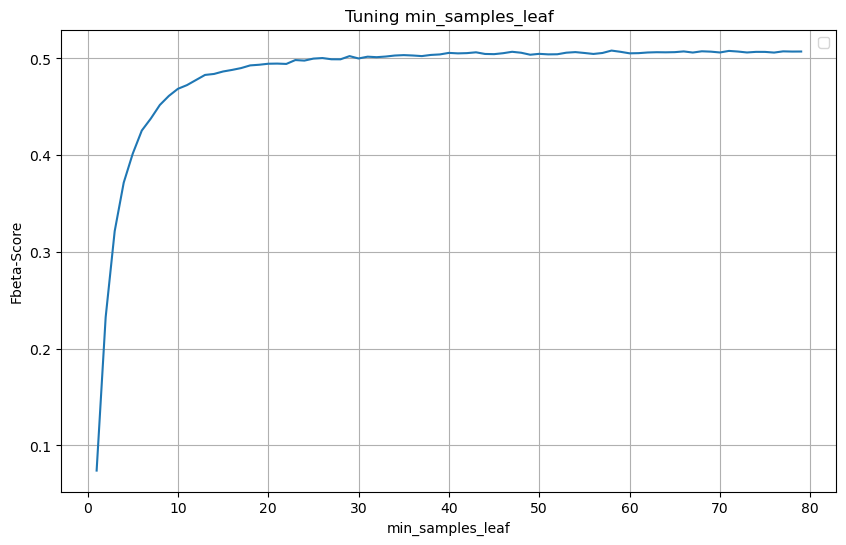

In [3]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(number_trees, results)

plt.title('Tuning min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()